In [4]:
import numpy as np
import matplotlib.pyplot as plt
from main import RustIsingExperimentBuilder, RustIsingExperiment, IsingData
from default_parameters import get_default_monte_carlo_parameters
import fssa

c:\Users\solof\Desktop\programming\Rust\GITHUB_PROJECTS\2d_ising_in_rust\calculation_manager\.venv\Lib\site-packages\fssa\__init__.py:83: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Perform Monte-Carlo calculation:

#### Overview

In [ ]:
rust_dir = "../ising_calculation"
folder   = "results"
name     = "overview"

In [ ]:
lengths         = [8, 16, 32, 64, 128]
temperatures    = np.linspace(0.5, 4.45, 80) # Same as np.arange(0.5, 4.5, 0.05), but number of steps is ensured.

(therm_steps, measure_steps) = get_default_monte_carlo_parameters(lengths)

In [ ]:
builder = RustIsingExperimentBuilder(name=name, folder=folder, rust_dir=rust_dir)

experiment: RustIsingExperiment = builder.new_from_parameters(therm_steps=therm_steps, measure_steps=measure_steps, temperatures=temperatures)
if not experiment.are_parameter_files_available():
    experiment.write_parameter_files()

In [ ]:
for L in experiment.get_lengths():
    if not experiment.has_output(L):
        experiment.perform_rust_computation(L)
    print("")

#### Load from file:

In [ ]:
rust_dir = "../ising_calculation"
folder   = "results"
name     = "overview"

builder_load = RustIsingExperimentBuilder(name=name, folder=folder, rust_dir=rust_dir)
lengths      = [8, 16, 32, 64, 128]

exp_from_file = builder_load.load(lengths)
results       = None
if exp_from_file.are_results_available():
    results = exp_from_file.get_results()

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))

plt.subplots_adjust(hspace=0.3)

fig.suptitle(f"2D Ising: Metropolis algorithm in Rust", y=0.95, fontsize=20)
temps = None
for (L, result) in results.items():
    result: IsingData
    if temps is None:
        temps = result.temperatures
        
    ax1.scatter(temps, result.energy_density, s=15, marker= 'x', label=f"N={L}x{L}")
    ax1.plot(temps, result.energy_density) 
    ax1.set_title(f"Energy density", fontsize=18)
    ax1.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax1.set_ylabel(r"Energy/spin [J]", fontsize=15)
    ax1.legend(loc="upper left", fontsize=14)

    ax2.scatter(temps, result.magnetisation, s=15, marker= 'x', label=f"N={L}x{L}")
    ax2.plot(temps, result.magnetisation)#, label="Rust")
    ax2.set_title(f"Magnetization", fontsize=18)
    ax2.legend(loc="lower left", fontsize=14)
    ax2.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax2.set_ylabel(r"$|m|$", fontsize=15)

    ax3.scatter(temps, result.specific_heat, s=15, marker= 'x', label=f"N={L}x{L}")
    ax3.plot(temps, result.specific_heat)#, label="Rust")
    ax3.set_title(f"Specific heat/spin", fontsize=18)
    ax3.legend(loc="upper left",fontsize=14)
    ax3.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax3.set_ylabel(r"$\chi_c$", fontsize=15)

    ax4.scatter(temps, result.mag_susceptibility, s=15, marker= 'x', label=f"N={L}x{L}")
    ax4.semilogy(temps, result.mag_susceptibility)
    ax4.set_title(f"Magnetic susceptibility/spin", fontsize=18)
    ax4.legend(loc="lower right",fontsize=14)
    ax4.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax4.set_ylabel(r"$\chi_M$", fontsize=15)


## Zoom close to the critical temperature

In [ ]:
rust_dir = "../ising_calculation"
folder   = "results"
name     = "critical_temperatures"

In [ ]:
temps_Tc1 = np.array([1.9 + i*0.02 for i in range(10)])
temps_Tc2 = np.array([2.1 + i*0.01 for i in range(40)])
temps_Tc3 = np.array([2.5 + i*0.02 for i in range(14)]) 
critical_temps  = np.concatenate((temps_Tc1, temps_Tc2, temps_Tc3))

lengths                      = [8, 16, 32, 64, 128]
(therm_steps, measure_steps) = get_default_monte_carlo_parameters(lengths)

In [ ]:
critical_builder = RustIsingExperimentBuilder(name=name, folder=folder, rust_dir=rust_dir)

critical_exp = critical_builder.new_from_parameters(therm_steps, measure_steps, np.array(critical_temps))
critical_exp.should_measure_correlation_length(True)

if not critical_exp.are_parameter_files_available():
    critical_exp.write_parameter_files()

In [ ]:
for L in critical_exp.get_lengths():
    if not critical_exp.has_output(L):
        critical_exp.perform_rust_computation(L)

In [ ]:
critical_results = critical_exp.get_results()

### Load from file

In [2]:
rust_dir = "../ising_calculation"
folder   = "results"
name     = "critical_temperatures"

builder_critic = RustIsingExperimentBuilder(name=name, folder=folder, rust_dir=rust_dir)
lengths        = [8, 16, 32, 64, 128]

critical_exp_file = builder_critic.load(lengths)
critical_results  = None
if critical_exp_file.are_results_available():
    critical_results = critical_exp_file.get_results()

>> Directory "../ising_calculation/results/critical_temperatures" Found.
>> Setting file paths:
-- setting paramfile "results/critical_temperatures/parameter_8x8.txt"
-- setting paramfile "results/critical_temperatures/parameter_16x16.txt"
-- setting paramfile "results/critical_temperatures/parameter_32x32.txt"
-- setting paramfile "results/critical_temperatures/parameter_64x64.txt"
-- setting paramfile "results/critical_temperatures/parameter_128x128.txt"
-- setting outfile "results/critical_temperatures/out_8x8.txt"
-- setting outfile "results/critical_temperatures/out_16x16.txt"
-- setting outfile "results/critical_temperatures/out_32x32.txt"
-- setting outfile "results/critical_temperatures/out_64x64.txt"
-- setting outfile "results/critical_temperatures/out_128x128.txt"
>> Looking for output files:
-- Found output: "../ising_calculation/results/critical_temperatures/out_8x8.txt"
-- Found output: "../ising_calculation/results/critical_temperatures/out_16x16.txt"
-- Found output: ".

### Plot!

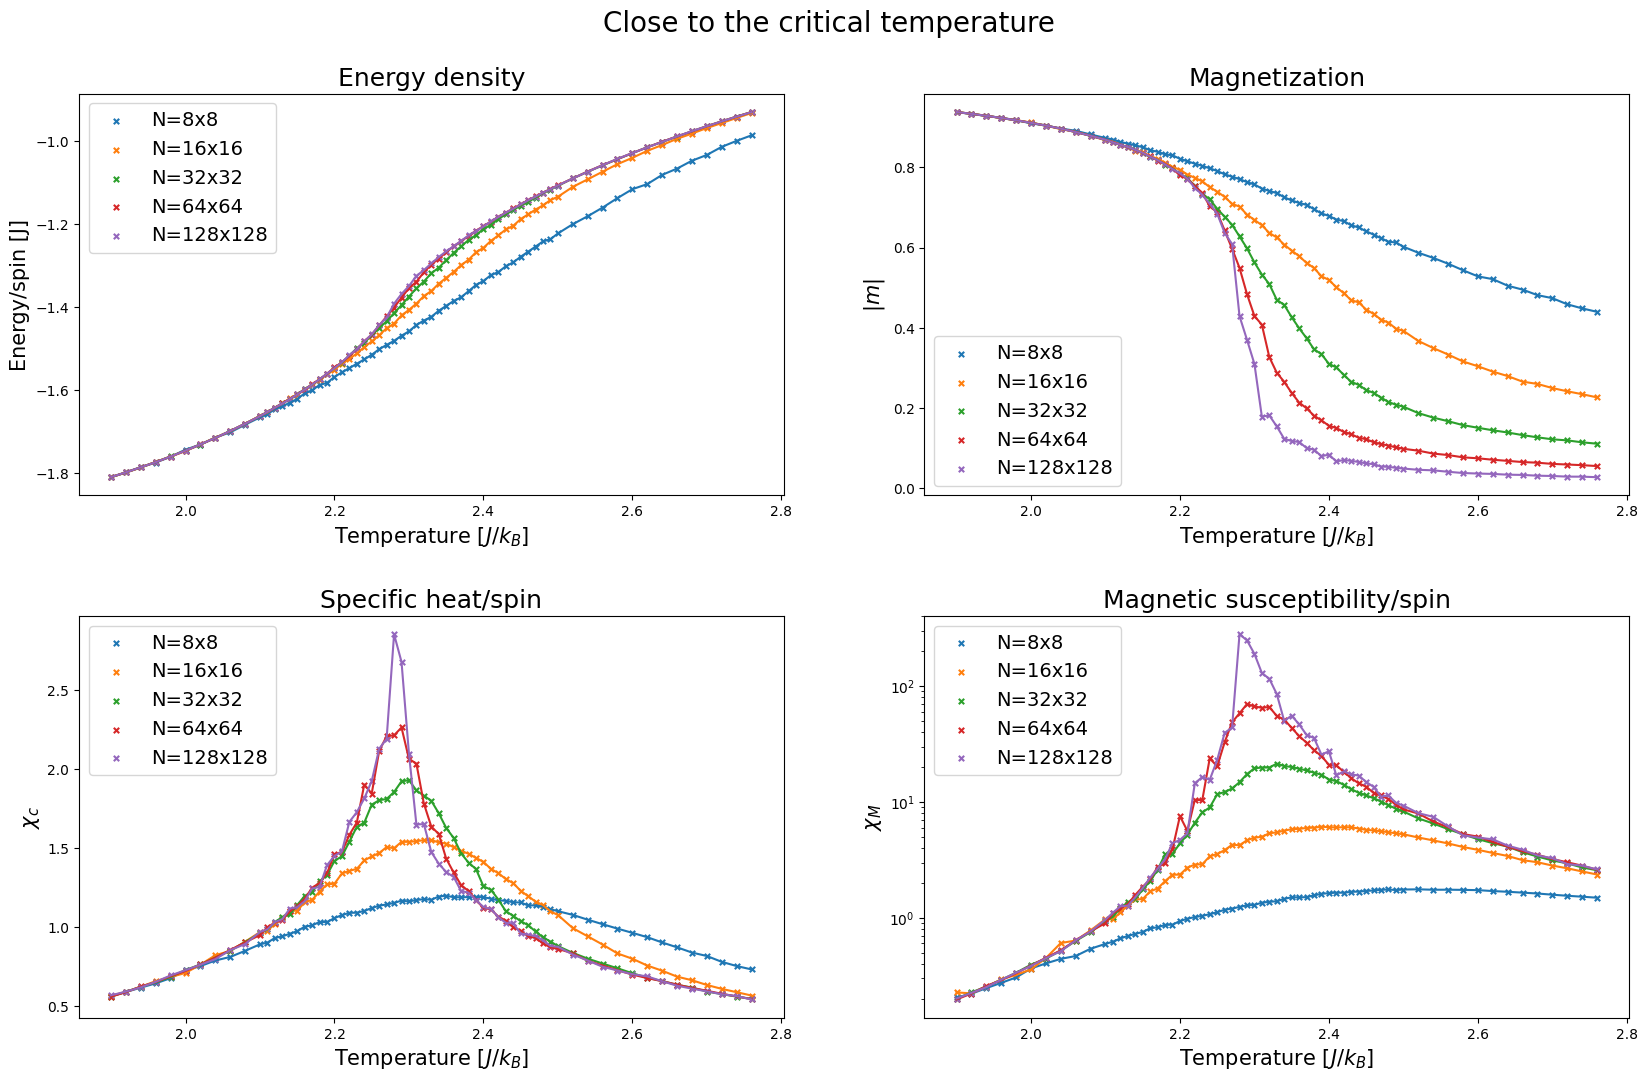

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,12))

plt.subplots_adjust(hspace=0.3)

fig.suptitle(f"Close to the critical temperature", y=0.95, fontsize=20)
temps=None
for (L, result) in critical_results.items():
    result: IsingData
    result: IsingData
    if temps is None:
        temps = result.temperatures
    
    
    ax1.scatter(temps, result.energy_density, s=15, marker= 'x', label=f"N={L}x{L}")
    ax1.plot(temps, result.energy_density) 
    ax1.set_title(f"Energy density", fontsize=18)
    ax1.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax1.set_ylabel(r"Energy/spin [J]", fontsize=15)
    ax1.legend(loc="upper left", fontsize=14)

    ax2.scatter(temps, result.magnetisation, s=15, marker= 'x', label=f"N={L}x{L}")
    ax2.plot(temps, result.magnetisation)#, label="Rust")
    ax2.set_title(f"Magnetization", fontsize=18)
    ax2.legend(loc="lower left", fontsize=14)
    ax2.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax2.set_ylabel(r"$|m|$", fontsize=15)

    ax3.scatter(temps, result.specific_heat, s=15, marker= 'x', label=f"N={L}x{L}")
    ax3.plot(temps, result.specific_heat)#, label="Rust")
    ax3.set_title(f"Specific heat/spin", fontsize=18)
    ax3.legend(loc="upper left",fontsize=14)
    ax3.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax3.set_ylabel(r"$\chi_c$", fontsize=15)

    ax4.scatter(temps, result.mag_susceptibility, s=15, marker= 'x', label=f"N={L}x{L}")
    ax4.semilogy(temps, result.mag_susceptibility)
    ax4.set_title(f"Magnetic susceptibility/spin", fontsize=18)
    ax4.legend(loc="upper left",fontsize=14)
    ax4.set_xlabel(r"Temperature [$J/k_B$]", fontsize=15)
    ax4.set_ylabel(r"$\chi_M$", fontsize=15)


# Finite Size scaling

Using this package: https://pyfssa.readthedocs.io/en/stable/user.html <br>
and this fork: https://github.com/JefferyWangSH/pyfssa/tree/master <br>
See also  **Computational Studies of Quantum Spin Systems** by *Anders W. Sandvik*: [arxiv](https://arxiv.org/pdf/1101.3281), fig 14

In [9]:
lengths      = []
mag_suscept  = []
temps        = None
for (L, res) in critical_results.items():
    res: IsingData
    if temps is None:
        temps = res.temperatures
    
    if L != 128:
        lengths.append(L)
        mag_suscept.append(res.mag_susceptibility)
    
lengths     = np.asarray(lengths)
mag_suscept = np.asarray(mag_suscept)

Theoretical values: https://www.mv.helsinki.fi/home/rummukai/simu/fss.pdf 

In [10]:
nu    = 1
zeta  = 1.75
rho_c = 2.27
a     = mag_suscept
da    = a * 0.1
ret   = fssa.autoscale(l=lengths, rho=temps, a=a, da=da, rho_c0=rho_c, nu0=1, zeta0=zeta)
ret

c:\Users\solof\Desktop\programming\Rust\GITHUB_PROJECTS\2d_ising_in_rust\calculation_manager\.venv\Lib\site-packages\fssa\fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.5158759039629088
             x: [ 2.266e+00  1.028e+00  1.799e+00]
           nit: 17
          nfev: 33
 final_simplex: (array([[ 2.266e+00,  1.028e+00,  1.799e+00],
                       [ 2.266e+00,  1.032e+00,  1.790e+00],
                       [ 2.267e+00,  1.026e+00,  1.792e+00],
                       [ 2.266e+00,  1.022e+00,  1.789e+00]]), array([ 5.159e-01,  5.190e-01,  5.227e-01,  5.232e-01]))
         varco: [[ 4.149e-05  2.261e-04  1.808e-03]
                 [ 2.261e-04  1.580e-03  1.986e-03]
                 [ 1.808e-03  1.986e-03 -2.455e-02]]
        errors: [ 6.441e-03  3.974e-02        nan]
           rho: 2.266473799968625
            nu: 1.0275737934644833
          zeta: 1.7986534505131617
          drho: 0.006440965383474815
           dnu: 0.03974301985243846
         dzeta: nan

In [11]:
auto_scaled_mag_suscept = fssa.scaledata(lengths, temps, a, da, ret.rho, ret.nu, ret.zeta)
print(ret.rho, ret.drho)
print(ret.nu, ret.dnu)
print(ret.zeta, ret.dzeta)
print(ret.fun)

2.266473799968625 0.006440965383474815
1.0275737934644833 0.03974301985243846
1.7986534505131617 nan
0.5158759039629088


NOTE: In the fssa package they use $\zeta$ for the critical exponent of the correlation length, whereas I use $\gamma$ to follow the notation of https://arxiv.org/pdf/1101.3281 (see figure 14)
Also: https://www.mv.helsinki.fi/home/rummukai/simu/fss.pdf

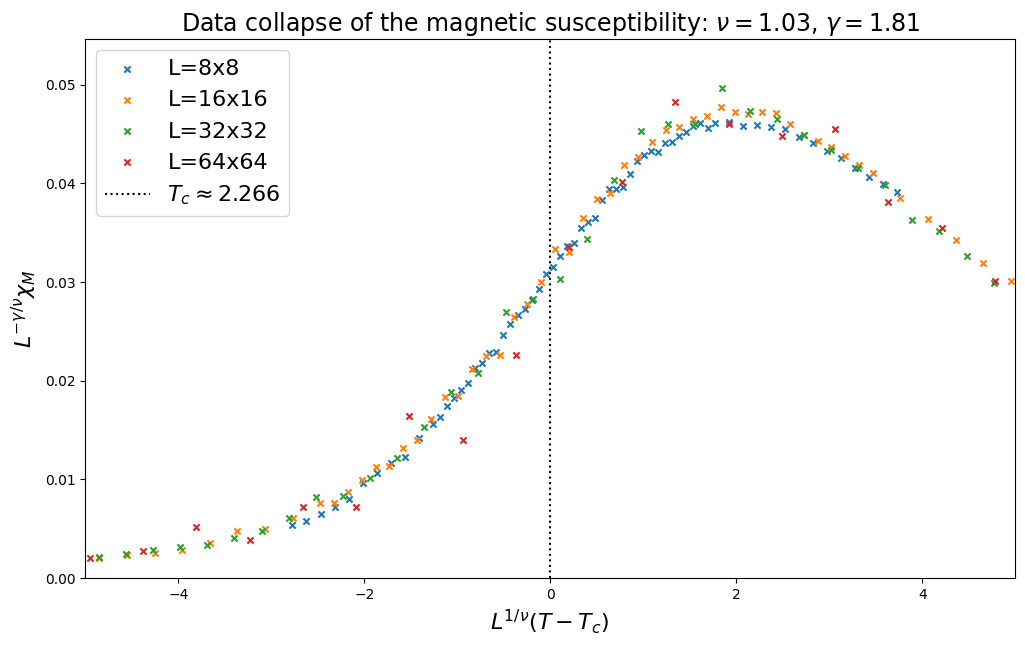

In [19]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title(r"Data collapse of the magnetic susceptibility: $\nu={0:.3}$, $\gamma={1:.3}1$".format(ret.nu, ret.zeta),fontsize=17)

max_y = 0
for (n, length) in enumerate(lengths):
    ax.scatter(auto_scaled_mag_suscept.x[n], auto_scaled_mag_suscept.y[n], label=f"L={length}x{length}", s=20, marker='x')

    max_data = np.max(auto_scaled_mag_suscept.y[n])
    if max_data > max_y:
        max_y = max_data
  
ax.set_xlabel(r'$L^{1/\nu}(T-T_c)$', fontsize=16)
ax.set_ylabel(r'$L^{-\gamma/{\nu}}\chi_M$', fontsize=16)
ax.vlines(0, 0, 1.1*max_y, colors='k', linestyles=':', label=r"$T_c \approx {0:.4}$".format(ret.rho))
ax.set_xlim(-5, 5)
ax.set_ylim(0,1.1*max_y)
ax.legend(fontsize=16)
plt.show()

# Correlation length

Using: Computational Studies of Quantum Spin Systems by Anders W. Sandvik
[arxiv](https://arxiv.org/pdf/1101.3281); equation 70


In [ ]:
from scipy.interpolate import CubicSpline, splrep, splev
precision     = 0.0001
temps_spline  = np.arange(temps[0],temps[-1], precision) 
coefs     = dict()
xi_spline = dict()

smoothing = {
    8: 0.01,
    16: 0.01,
    32: 0.01,
    64: 0.075,
    128: 0.9
}

for (L, result) in critical_results.items():
    result: IsingData
    xi = result.correlation_length/L
    
    coefs[L]     = splrep(temps, xi, s=smoothing[L], k=3)
    xi_spline[L] = splev(temps_spline, coefs[L])

In [ ]:
crossing_indices= []
for i in range(0, len(lengths)):
    for j in range(i+1, len(lengths)):
        L1 = lengths[i]
        L2 = lengths[j]
        diffs     = abs(xi_spline[L1] - xi_spline[L2])
        min_index = np.argmin(diffs)
        crossing_indices.append(min_index)

crossing_temps = [temps_spline[index] for index in crossing_indices]

significant = -int(np.log10(precision))
Tc          = round(np.mean(crossing_temps), significant)
Tc_std      = round(np.sqrt(np.var(crossing_temps, ddof=1)), significant)

print(f"Tc={Tc} +/- {Tc_std}")

In [ ]:
plt.figure(figsize=(15,10))
plt.title(r'Correlation length $\zeta$ over system size: obtained from $S(\mathbf{q}) = <\sigma_{\mathbf{q}}\sigma_{\mathbf{-q}}>$',fontsize=18)

ymin = 2*10**(-2)
ymax = 3*10

for (L, result) in critical_results.items():
    result: IsingData
    if temps is None:
        temps = result.temperatures
        
    label = ""
    if L == 8:
        label = "Splines interpolation"
        
    plt.plot(temps_spline, xi_spline[L], label=label)
    plt.scatter(temps, result.correlation_length/L, label=f"L={L}")
    plt.ylabel(r'$\zeta / L$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(2.0, 2.6)
    plt.ylim(ymin, ymax)
    plt.yscale('log')
    plt.xlabel(r"Temperature [$J/k_B$]", fontsize=20)
plt.vlines(Tc,ymin, ymax, colors='k', linestyles=":", label=r"$T_c\approx {0} $\pm$ {1}".format(Tc, Tc_std))
plt.legend(loc='upper right',fontsize=20)
